## Plotting a list of fields

In [1]:
import earthkit
from earthkit.maps import Chart

In [2]:
ens_data = earthkit.data.from_source("file", "/Users/mavj/Downloads/wgust_ens.grib")
data = ens_data.sel(stepRange="72-78")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,10fg6,surface,0,20140807,0,72-78,pf,1,regular_ll
1,ecmf,10fg6,surface,0,20140807,0,72-78,pf,2,regular_ll
2,ecmf,10fg6,surface,0,20140807,0,72-78,pf,3,regular_ll
3,ecmf,10fg6,surface,0,20140807,0,72-78,pf,4,regular_ll
4,ecmf,10fg6,surface,0,20140807,0,72-78,pf,5,regular_ll
5,ecmf,10fg6,surface,0,20140807,0,72-78,pf,6,regular_ll
6,ecmf,10fg6,surface,0,20140807,0,72-78,pf,7,regular_ll
7,ecmf,10fg6,surface,0,20140807,0,72-78,pf,8,regular_ll
8,ecmf,10fg6,surface,0,20140807,0,72-78,pf,9,regular_ll
9,ecmf,10fg6,surface,0,20140807,0,72-78,pf,10,regular_ll


### Automatic plotting of a list of fields

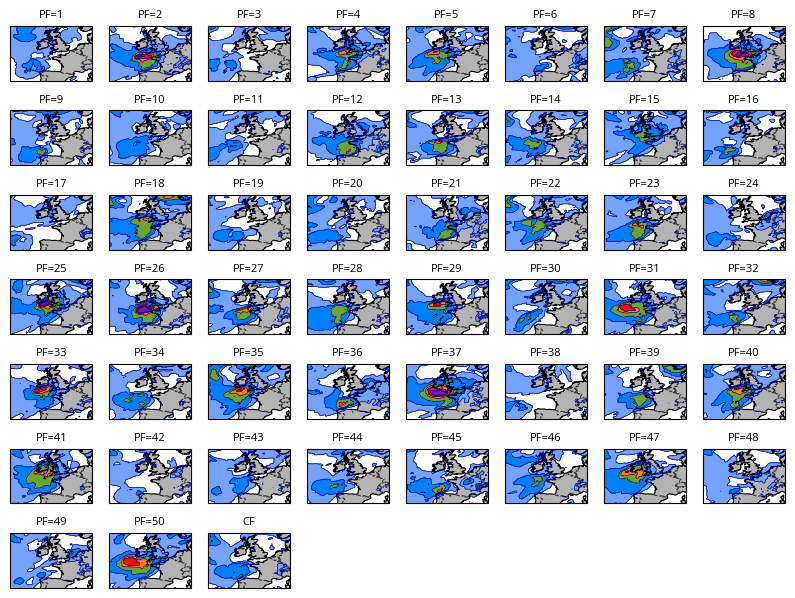

In [3]:
COLORS = ["sky", "greenish_blue", "avocado", "orange", "orangish_red", "violet"]
LEVELS = [10, 15, 20, 25, 30, 35, 50]

chart = Chart()
chart.contourf(data, colors=COLORS, levels=LEVELS)
chart.contour(data, colors="navy", linewidths=0.5, levels=LEVELS)
chart.land()
chart.coastlines()
chart.borders()
chart.subplot_titles("PF={number}")
chart.subplots[-1].title("CF")

chart.show()

In [4]:
control = ens_data.sel(number=0)
control.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,10fg6,surface,0,20140807,0,72-78,cf,0,regular_ll
1,ecmf,10fg6,surface,0,20140807,0,78-84,cf,0,regular_ll
2,ecmf,10fg6,surface,0,20140807,0,84-90,cf,0,regular_ll


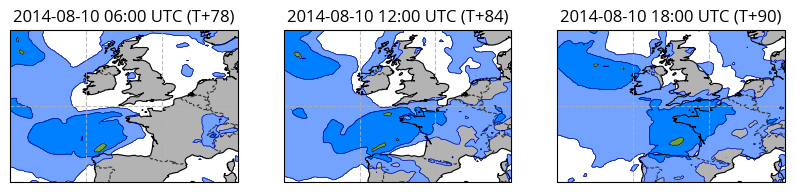

In [5]:
chart = Chart()
chart.contourf(control, colors=COLORS, levels=LEVELS)
chart.contour(control, colors="navy", linewidths=0.5, levels=LEVELS)
chart.land()
chart.coastlines()
chart.borders()
chart.gridlines(draw_labels=False, xlocs=range(-20, 20, 10), ylocs=range(40, 60, 10))
chart.subplot_titles("{valid_time:%Y-%m-%d %H:%M} UTC (T+{lead_time})")

chart.show()

### Custom layout

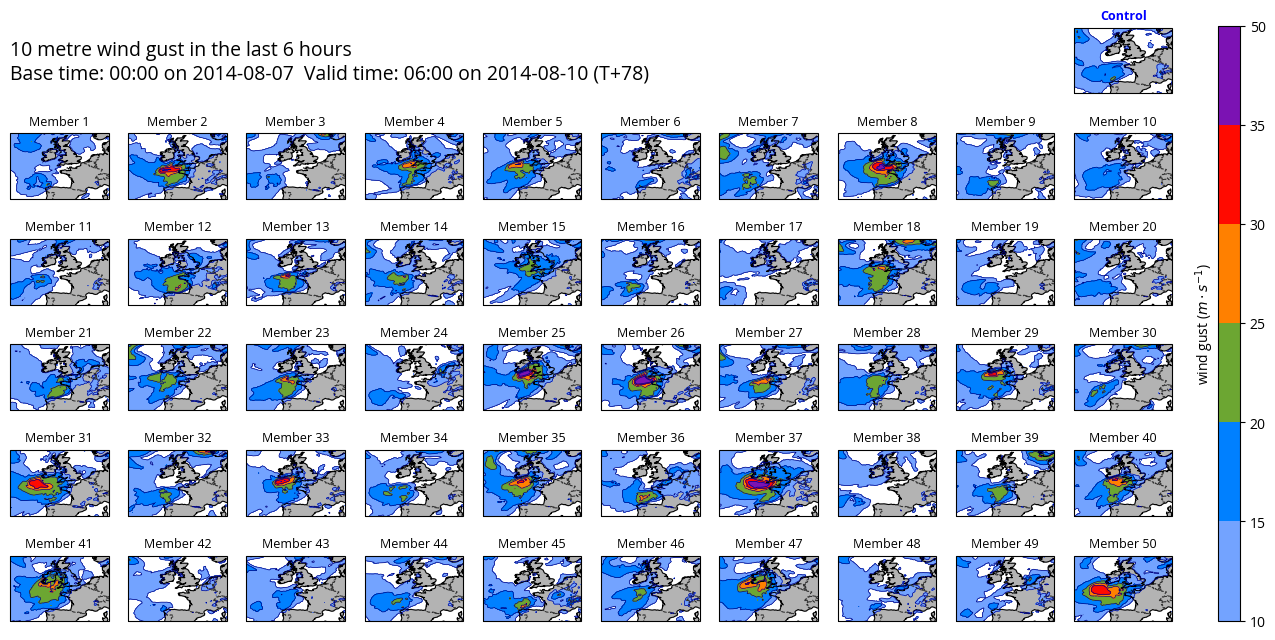

In [6]:
import matplotlib.pyplot as plt
from cf_units.tex import tex

chart = Chart(figsize=(15, 8), nrows=6, ncols=10)

# Plot the perturbed members
for i in range(50):
    subplot = chart.add_subplot(6, 10, i+11, crs="PlateCarree")
    field = data.sel(number=i+1)[0]
    subplot.contourf(field, colors=COLORS, levels=LEVELS)
    subplot.contour(field, colors="navy", linewidths=0.5, levels=LEVELS)
    subplot.title("Member {number}")

# Plot the control member
subplot = chart.add_subplot(6, 10, 10, crs="PlateCarree")
field = data.sel(number=0)[0]
subplot.contourf(field, colors=COLORS, levels=LEVELS)
subplot.contour(field, colors="navy", linewidths=0.5, levels=LEVELS)
subplot.title("Control", color="blue", weight="bold")

chart.land()
chart.coastlines()
chart.borders()

cax = chart.fig.add_axes([0.93, 0.125, 0.015, 0.743])
colorbar = plt.colorbar(chart.subplots[0].layers[0].layer, cax=cax, orientation="vertical")

units = tex("m s**-1")
colorbar.set_label(f"wind gust (${units}$)", labelpad=-52)

chart.title(fontsize=14)

chart.show()